# Глубинное обучение для текстовых данных, ФКН ВШЭ

## Домашнее задание 2: Токенизация и классификация рекуррентными нейронными сетями

### Оценивание и штрафы

Максимально допустимая оценка за работу — 13 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Весь код должен быть написан самостоятельно. Чужим кодом для пользоваться запрещается даже с указанием ссылки на источник. В разумных рамках, конечно. Взять пару очевидных строчек кода для реализации какого-то небольшого функционала можно.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

Это задание посвящено решению задачи классификации тональности текста с помощью рекуррентных нейронных сетей (и сверточных). В отличие от предыдущей домашки, в этом задании не будет шаблонов кода, вам придется написать все самостоятельно, поэтому постарайтесь хорошо организовать код. Мы крайне рекомендуем реализовывать все модели и вспомогательные функции в отдельных файлах, а затем их импортировать. Иначе вы рискуете превратить ноутбук в кашу.

Обучение не должно занимать много времени, однако для ускорения мы советуем использовать различные приемы, такие как mixed-precision ([ссылка](https://huggingface.co/docs/accelerate/package_reference/accelerator) и [ссылка](https://pytorch.org/docs/stable/amp.html)) и torch.compile (для torch >= 2.0, [ссылка](https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html)). Так же мы настоятельно рекомендуем логировать все графики обучения с помощью платформы [wandb](https://docs.wandb.ai/quickstart).

Все модели нужно будет реализовывать на pytorch (считать градиенты руками не надо). При обучении разных моделей используйте одинаковые параметры оптимизатора, базмер батча, а так же учите либо одинаковое число эпох, либо до сходимости. В общем, постарайтесь, чтобы сравнение всегда было максимально честным.


__Мягкий дедлайн: 03.11.23 23:59__

__Жесткий дедлайн: 07.11.23 23:59__

### Данные и токенизация

Мы будем обучать модель на задачу классификации тональности текста. Данные взяты с платформы IMDb и содержат положительные и отрицательные отзывы о фильмах, примерно по 5к текстов каждого класса. Вы можете найти их в папке `datasets/IMDb`.

In [1]:
%load_ext autoreload
%autoreload 2

__Задание 1 (2 балла)__
Как всегда, для работы с текстом нам нужно как-то его токенизировать. В этом задании вам предстоит заняться этим. Выберите один из трех методов токенизации, разобранных на лекции: __BPE__, __WordPiece__, __Unigram__. Реализуйте его самостоятельно без использования специализированных библиотек (например, huggingface). Ваш токенизатор должен иметь интерфейс токенизатора из huggingface. То есть он должен иметь метод `encode`, возвращающий словарь с полями `input_ids` и `attention_mask`, а так же метод `decode`, принимающий последовательности токенов и возвращающий соответствующие им тексты. Ограничьте размер словаря 30000 токенами. Ваш токенизатор не обязан добавлять токены начала и конца последовательности, потому что они не обязательны в задаче классификации. Однако при желании вы можете их добавить. Все тонкости реализации, такие как прочие аргументы функций, типы переменных и так далее остаются на ваше усмотрение.

In [1]:
# your code here

__Задание 1 (0 баллов)__
Прочитайте датасет и сложите все в `DataLoader`. Вы можете предобрабатывать тексты дополнительно как вам хочется.

In [ ]:
# your code here

## Сверточные нейронные сети

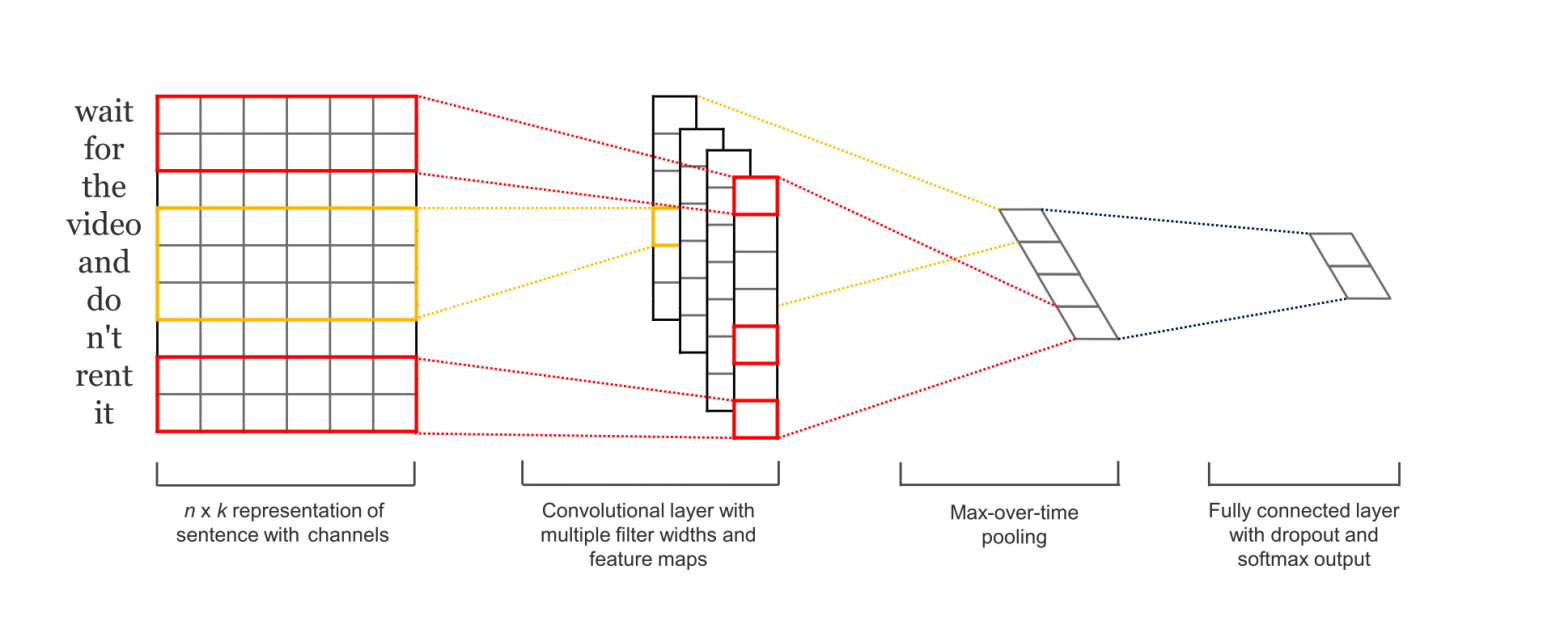

__Задание 3 (2 балла)__ В качестве бейзлайна для решения задачи реализуйте и обучите сверточную нейронную сеть с одномерными свертками (`torch.nn.Conv1d`). Число сверточных слоев можете выбрать по своему усмотрению, однако не делайте сеть слишком большой. Это задание требуется для установки бейзлайна, поэтому лучше не тратить много времени на обучение и подгонку параметров. У вас должна получиться точность классификации на тестовой выборке около 80% (больше тоже хорошо). 

In [ ]:
# your code here

## Рекуррентные нейронные сети

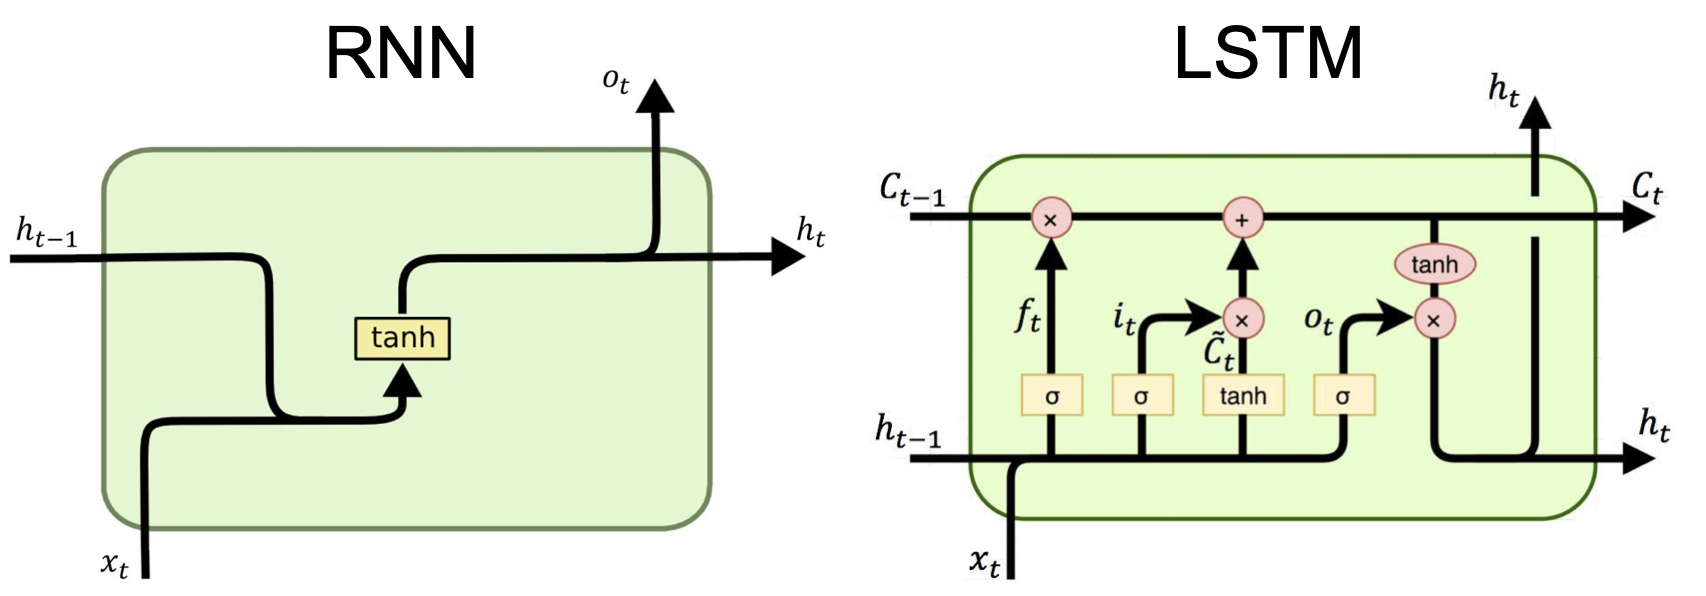

В этой секции вам предстоит реализовать два вида рекуррентных нейронных сетей: RNN, LSTM. Вот они с слева направо. Начнем с RNN.

__Задание 4 (1.5 балла)__ Реализуйте классическую рекуррентную нейронную сеть с одним слоем. Как вы знаете из лекции, такая сеть плохо выучивает долгосточные зависимости в данных, поэтому работают плохо с длинными текстами. Обучите реализованную RNN и проверьте, так ли это, замерив точность на тестовой выборке.

In [3]:
# your code here

__Задание 5 (2.5 балла)__ 
В предыдущем задании скорее всего качество RNN у вас должно было получиться хуже, чем у CNN. Попробуем исправить это, добавив в модель вектор памяти. Реализуйте модель LSTM и сравните ее качество с RNN. Напомним, что скрытые состояния LSTM считаются по следующим формулам:
$$
\begin{gathered}
f_t=\sigma\left(W_f \cdot\left[h_{t-1}, x_t\right]+b_f\right) \\
i_t=\sigma\left(W_i \cdot\left[h_{t-1}, x_t\right]+b_i\right) \\
o_t=\sigma\left(W_o \cdot\left[h_{t-1}, x_t\right]+b_o\right) \\
\tilde{C}_t=\tanh \left(W_c \cdot\left[h_{t-1}, x_t\right]+b_c\right) \\
C_t=f_t \odot C_{t-1}+i_t \odot \tilde{C}_t \\
h_t=o_t \odot \tanh \left(C_t\right)
\end{gathered}
$$

In [4]:
# your code here

__Бонус (1 балл)__ Проверьте, на что влияет каждый гейт в LSTM. Попробуйте отключать каждый из них по очереди (выход гейта всегда 1) и посмотрите, при отключении каких из них точность падает сильнее. Совпадает ли результат с вашими ожиданиями?

In [5]:
# your code here

__Задание 6 (1 балл): Многослойная рекуррентная сеть.__
Часто увеличение число слоев в рекуррентных нейронных сетях помогает улучшить способность модели извлекать информацию из текста. Дополнительный слой – это еще одна LSTM поверх выходов предыдущей. Добавьте в вашу модель возможность создания сети с произвольным числом слоев. Обучите двухслойную LSTM и сравните качество с однослойной версией. Подтвердилась ли теория?

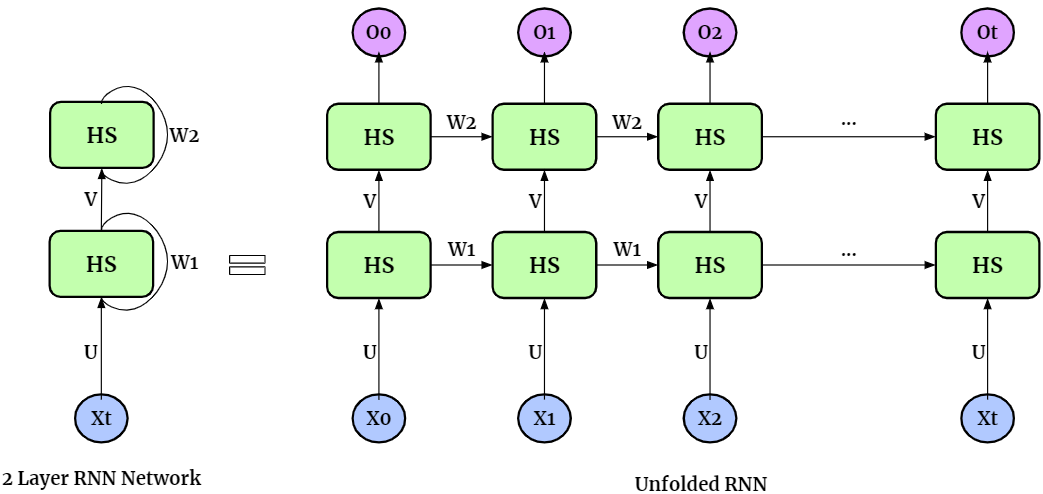


In [1]:
# your code here

__Задание 6 (1 балл): Двунаправленная рекуррентная сеть.__ Для некоторых задач классификации может помочь смотреть на последовательность слева направо и справа налево одновременно. Рекуррентные сети с такой способностью называются двунаправленными (bidirectional). Реализуйте данный функционал в вашей LSTM модели. Заметьте, что такая модификация увеличивает число параметров модели так же, как и добавление еще одного слоя. Какая из этих двух модификаций оказывается лучше?

__ВАЖНО:__ Подумайте о том, как лучше агрегировать выходы разнонаправленных моделей. Попробуйте разные способы.

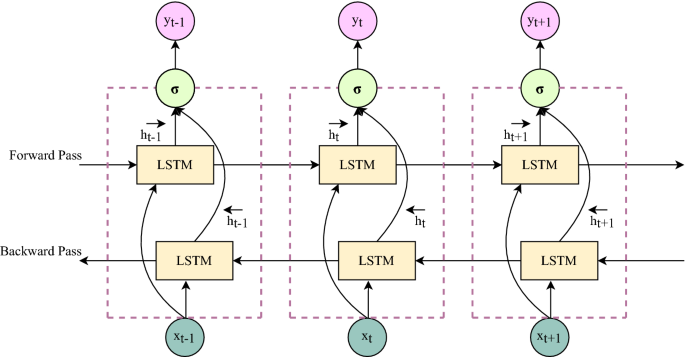

In [2]:
# your code here

__Бонус (до 2 баллов)__ На практике часто приходится обучать модель на одних данных, а применять – к другим. Если и те, и другие данные лежат в одном распределении (__ID__ – in-distribution), то качество на них оказывается примерно одинаковым. Однако, если новые данные лежат в каком-то другом распределение (__OOD__ – out-of-distribution), то модель может плохо обобщаться на них.

В этом бонусе вам предлагается обучить модель на датасета __IMDb__ и протестировать на __Yelp__ (содержит положительные и отрицательные отзывы о ресторанах). Вы можете использовать любые методы, пройденные к моменту выдачи этого задания, а так же произвольные их комбинации. Ограничений нет никаких за исключением того, что вам запрещается дообучаться на __Yelp__. Ваша задача – получить самую обобщаемую модель.

Для оценки качества вашей модели вы должны будете посчитать предсказания для текстов из файла `datasets/Yelp/reviews.txt`. Договоримся, что положительный класс будет обозначаться за 1, а отрицательный за 0. Ваши предсказания в формате текстового файла из цифр 0 и 1, разделенных переносом строки, вы должны будете отправить тг-боту [@hse_nlp_hw2_competition_bot](https://t.me/hse_nlp_hw2_competition_bot). Он посчитает точность и запишет ваш результат в табличку. Если бот не работает, пишите [@amshabalin](https://t.me/amshabalin).

В соревновании будет публичный и приватный лидерборд. Публичный будет находиться в табличке, которую возвращает бот, а приватный будет посчитан после дедлайна. Баллы за это задание будут начислены всем участником, получившим точность больше __0.65__, и будут обратно пропорциональны месту в _приватном_ лидерборде. $$\text{число баллов} = \frac{2(N - r + 1)}{N},$$ где r – место в лидерборде, а N - число участников.


Формат файла с предсказаниями:

```
1
0
0
1
1
...
```

In [ ]:
# your code here